In [54]:
import subprocess
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [88]:
def compile(window_size: int):
    out = subprocess.run(["g++", "-std=c++23", "stepwise_realdata.cpp", "-o", "stepwise_realdata", f"-DWINSIZE={window_size}"])
    return out

In [89]:
def run():
    out = subprocess.run(["./stepwise_realdata"], cwd=os.getcwd(), capture_output=True)
    return out

In [114]:
winsize = 50
compile(winsize)

CompletedProcess(args=['g++', '-std=c++23', 'stepwise_realdata.cpp', '-o', 'stepwise_realdata', '-DWINSIZE=50'], returncode=0)

In [116]:
out = run().stdout
nums = [[float(s) for s in line.split()] for line in out.splitlines()]
df = pd.DataFrame(nums, columns=['t', 'press', 'm', 'b']).set_index('t')

In [111]:
len(df)

40000

-1.032456 75.765282


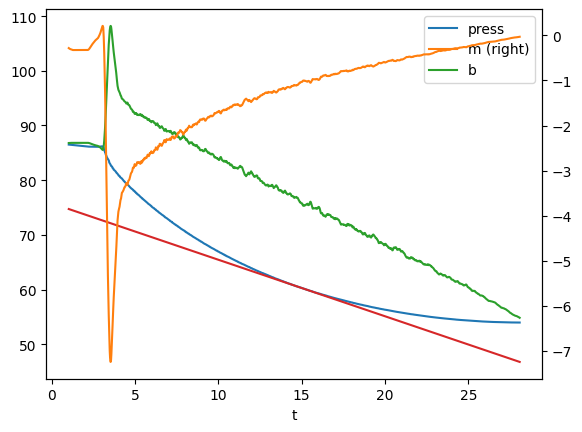

In [141]:
dat = df.loc[1:28.09]
f = dat[['press', 'm', 'b']].plot(secondary_y='m')
m, b = df[['m', 'b']].loc[15:].iloc[0]
print(m,b )
func = lambda x : m * x + b
f.plot(dat.index, func(dat.index))

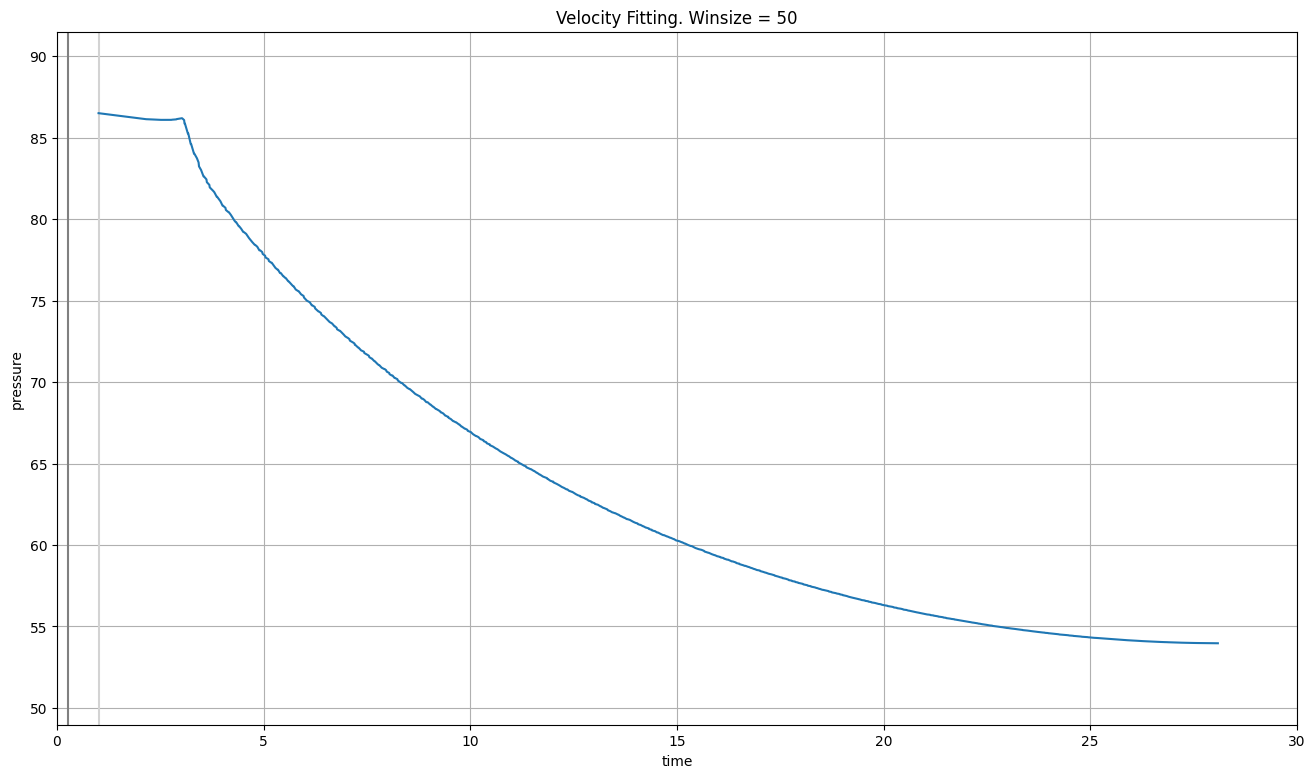

In [199]:
num_frames=280
fig,ax = plt.subplots(figsize=(16, 9))
ax.set_title(f"Velocity Fitting. Winsize = {winsize}")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Pressure (kPa)")

vln = plt.axvline(df.iloc[0].name, c= 'gray')
back = plt.axvline(df.iloc[0].name, c= 'lightgray')
ax.plot(dat.index, dat.press)

ln,=ax.plot([],[], linewidth=5) 

plt.xlabel('time')
plt.ylabel('pressure')
plt.grid()
plt.xlim(0, 30)
plt.ylim(dat.press.min() - 5, dat.press.max() + 5)


def animate(i):
  ind = i * 10
  x = df.iloc[ind].name
  m, b = df[['m', 'b']].iloc[ind]
  func = lambda x : m * x + b

  hs = 1
  xs = dat.index.to_series().loc[x-hs:x+hs]
  ln.set_data(xs, func(xs))

  since = dat.loc[x-hs:].iloc[0].name

  back.set_xdata([since, since])
  vln.set_xdata([x, x])
#   ln.set_color(color[i])
  return ln

ani = FuncAnimation(fig, animate, frames=num_frames, interval=16)
ani.save(f'linearfit_{winsize}samples.mp4')